# Prediction sur les operations de banking 

## LOAN PREDICTION DATASET PREDICTION

## Import Librairies

In [70]:
# install Google Drive librairies
!pip3 install gdown --quiet
!pip3 install --upgrade gdown --quiet # to upgrade

In [71]:
# install Graphviz on Conda
!pip3 install graphviz --quiet

In [72]:
# import librairies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbn
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV # could take a longtime

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from graphviz import Source
from sklearn.preprocessing import LabelEncoder
import gdown
from datetime import datetime

plt.rcParams['figure.figsize']=[25,15]

## Telechargement des fichiers/Datasets

In [73]:
# a file
url = "https://drive.google.com/file/d/1uxLQY3E7eXiO2Cm86gDhjwnqP3wqNqt2/view?usp=sharing"
# same as the above, but with the file ID
output = 'banking_dts.csv'
id = "1uxLQY3E7eXiO2Cm86gDhjwnqP3wqNqt2"
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1uxLQY3E7eXiO2Cm86gDhjwnqP3wqNqt2
To: /Users/michelo/Downloads/banking_dts.csv
100%|██████████| 4.88M/4.88M [00:01<00:00, 3.76MB/s]


'banking_dts.csv'

In [74]:
import pwd
pwd

<module 'pwd' (built-in)>

In [75]:
# read the dataset
# df = pd.read_csv("/content/creditcard_dataset.csv")
# /Users/michelo/Downloads/creditcard_dataset.csv
df = pd.read_csv("/Users/michelo/Downloads/banking_dts.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [76]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [77]:
df.shape

(41188, 21)

## Missing values

In [ ]:
#missing values in decsending order
df.isnull().sum().sort_values(ascending=False)

In [78]:
# checking null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [79]:
# Put all values in their category

cat_features=list()
num_features=list()
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<30:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)

In [80]:
print ("Categoric values -->",cat_features)
print ("Numeric values -->",num_features)

Categoric values --> ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'nr_employed', 'y']
Numeric values --> ['age', 'duration', 'campaign', 'euribor3m']


In [81]:
# check na columns
df[df['loan'].isna()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


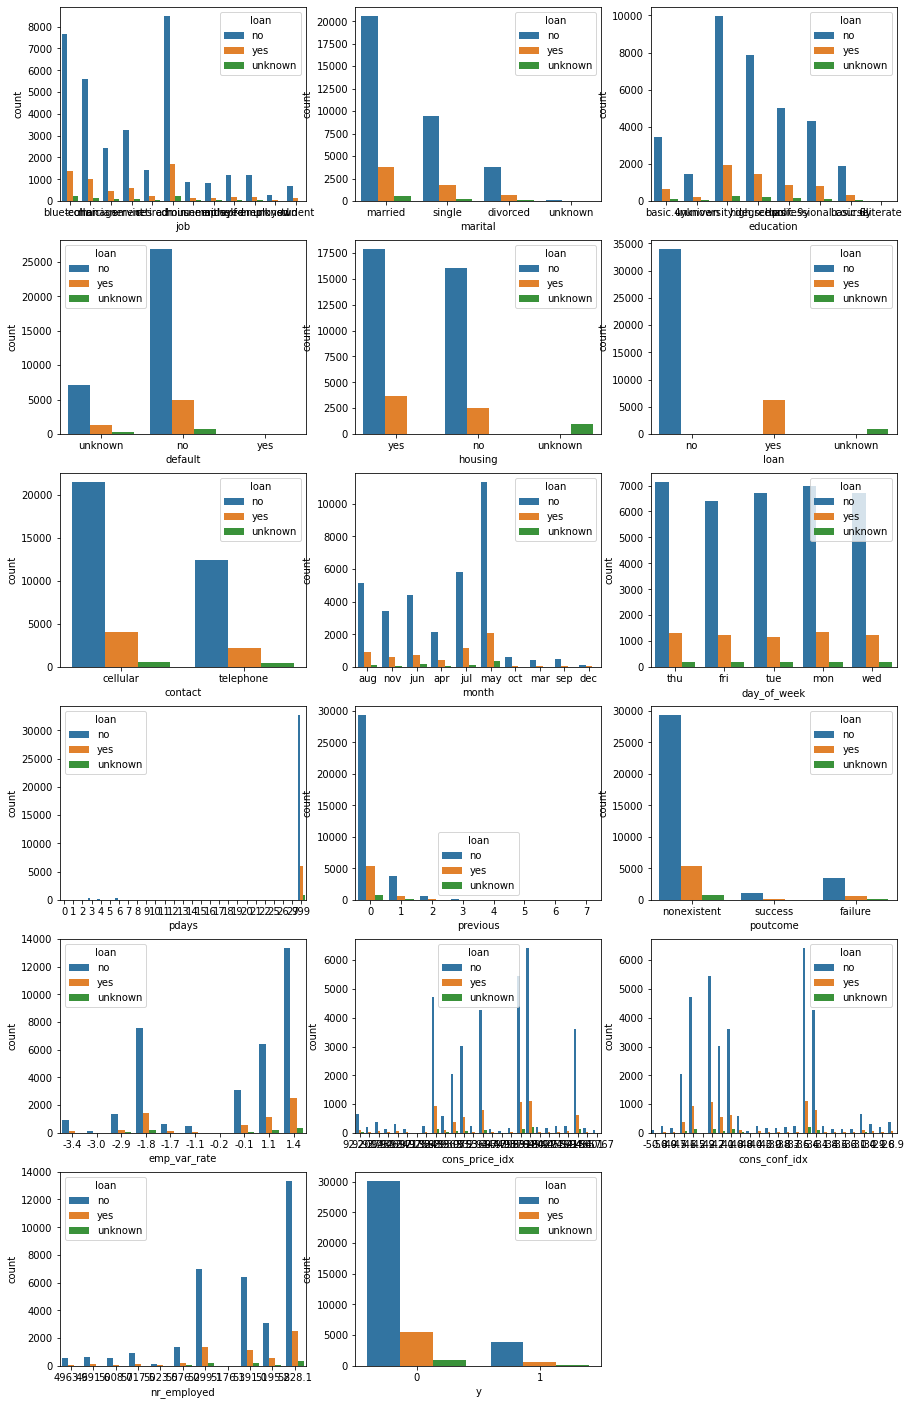

In [82]:
i = 1
plt.figure(figsize = (15,25))
for feature in cat_features:
    plt.subplot(6,3,i)
    sbn.countplot(x = feature , data = df,hue='loan')
    i +=1

## Verify unique values for each categoric field

In [83]:
df['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [84]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [85]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [86]:
df['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [87]:
df['emp_var_rate'].unique()

array([ 1.4, -0.1, -1.7, -1.8, -2.9,  1.1, -3.4, -1.1, -3. , -0.2])

In [88]:
df['cons_price_idx'].unique()

array([93.444, 93.2  , 94.055, 93.075, 92.201, 93.918, 92.893, 92.963,
       93.994, 94.465, 93.798, 92.431, 92.649, 92.843, 92.469, 93.749,
       93.876, 94.027, 94.199, 94.601, 92.713, 94.767, 93.369, 94.215,
       92.379, 92.756])

In [89]:
df['cons_conf_idx'].unique()

array([-36.1, -42. , -39.8, -47.1, -31.4, -42.7, -46.2, -40.8, -36.4,
       -41.8, -40.4, -26.9, -30.1, -50. , -33.6, -34.6, -40. , -38.3,
       -37.5, -49.5, -33. , -50.8, -34.8, -40.3, -29.8, -45.9])

In [90]:
df['nr_employed'].unique()

array([5228.1, 5195.8, 4991.6, 5099.1, 5076.2, 5191. , 5017.5, 5008.7,
       4963.6, 5023.5, 5176.3])

## Label Encoder

In [91]:
# drop some columns

df.drop(['default','month','day_of_week','poutcome'], axis='columns', inplace=True)

In [92]:
# Import the label ecoding module using "sklearn.preprocessing import LabelEncoder"

le_job = LabelEncoder()
le_marital = LabelEncoder()
le_education = LabelEncoder()
le_housing = LabelEncoder()
le_emp_var_rate = LabelEncoder()
le_cons_price_idx = LabelEncoder()
le_nr_employed = LabelEncoder()
le_contact = LabelEncoder()

df_final_dts = df.copy() # let's keep a copy of the dataset
# now we could encode all others values
df_final_dts.job = le_job.fit_transform(df_final_dts.job) 
df_final_dts.marital = le_marital.fit_transform(df_final_dts.marital)
df_final_dts.education = le_education.fit_transform(df_final_dts.education)
df_final_dts.housing = le_housing.fit_transform(df_final_dts.housing)
df_final_dts.emp_var_rate = le_emp_var_rate.fit_transform(df_final_dts.emp_var_rate)
df_final_dts.cons_price_idx = le_cons_price_idx.fit_transform(df_final_dts.cons_price_idx)
df_final_dts.nr_employed = le_nr_employed.fit_transform(df_final_dts.nr_employed)
df_final_dts.contact = le_contact.fit_transform(df_final_dts.contact)

### do the same for the target columns using dictionnary

In [93]:
df_final_dts['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [94]:
# Encodage de waterbody et airport
df_final_dts.replace({'loan': {'no': 0, 'yes': 1, 'unknown':2}},inplace=True)
df_final_dts.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,yes,0,0,210,1,999,0,9,13,-36.1,4.963,10,0
1,53,9,1,7,no,0,0,138,1,999,0,7,11,-42.0,4.021,9,0
2,28,4,2,6,yes,0,0,339,3,6,2,4,20,-39.8,0.729,1,1
3,39,7,1,3,no,0,0,185,2,999,0,3,10,-47.1,1.405,6,0
4,55,5,1,0,yes,0,0,137,1,3,1,2,0,-31.4,0.869,5,1


### Matrice de correlation

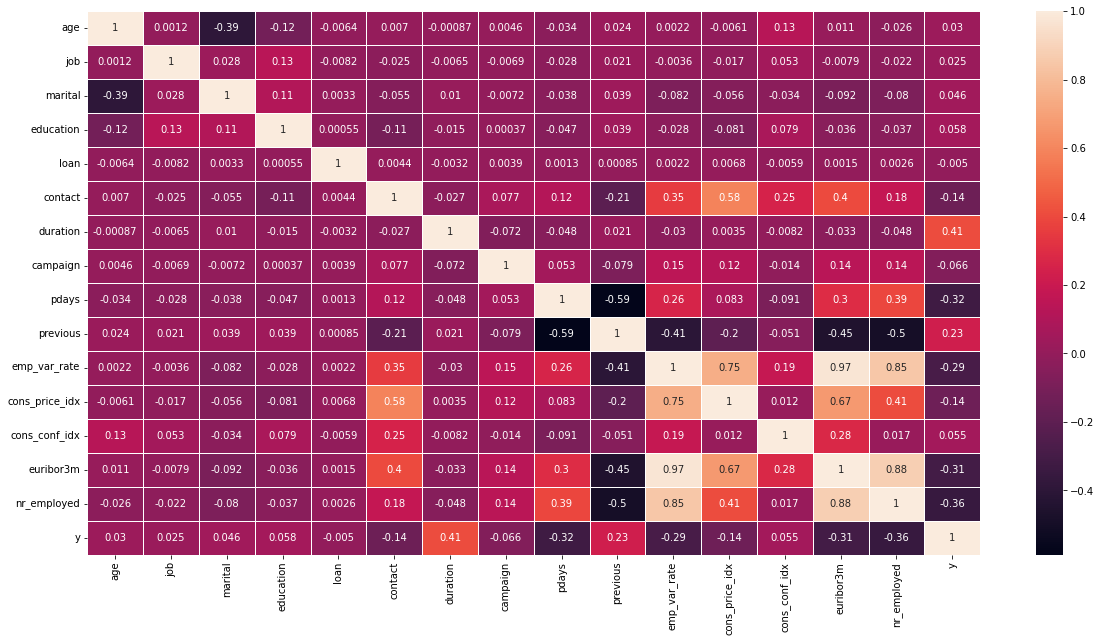

In [95]:
# Matrice de corrélation
corr = df_final_dts.corr()

# Graphe de corrélation
f, ax = plt.subplots(figsize=(20, 10))
sbn.heatmap(corr, annot=True, linewidths=.5, ax=ax) #, fmt=".3f"
plt.show()

## Split data to training dataset

In [ ]:
y = df['loan']
X = df.drop('loan', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

## Logistic regression

In [ ]:
# random_state 
rs = 42
lr = LogisticRegression(random_state = rs)

# SVM CLASSIFIER [NO HYPERPARAMETERS]

## Let's fit a SVM classfier (with no hyperparameters specified).

In [ ]:
# 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
#        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
#        'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
#        'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'

features_to_use = ["age", "job", "Age", "education", "duration", "emp_var_rate","cons_price_idx","euribor3m","nr_employed"]

clf = SVC(gamma='auto')
X_train, X_test, y_train, y_test = train_test_split(df_final_dts[features_to_use],
                                                    df_final_dts["loan"],
                                                    test_size=0.2,
                                                    random_state=0) # random_state for reproducible results

clf.fit(X_train, y_train)
clf_score = clf.score(X_test, y_test)
print(f"Score = {clf_score}")

In [ ]:
df_final_dts.shape

# SVM CLASSIFIER [HYPERPARAMETERS]

## II.1. `GridSearchCV`: Exhaustive Grid Search

In [ ]:
param_grid_ = [
  {'C': [1, 10, 100], 'kernel': ['linear']},
  {'C': [100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ] # With this param_grid, we can test 8 combinations of hyperparameters

clf = SVC()
clf = GridSearchCV(clf,
                   param_grid=param_grid_,
                   cv=3, # `cross validation` technique
                   verbose=10, 
                   n_jobs=1
                  )
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

## Results

In [ ]:
clf.cv_results_

### Best score found : `best_score_`

In [ ]:
clf.best_score_

### Best Estimator

In [ ]:
clf.best_estimator_